In [21]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style("darkgrid")

In [22]:
df = pd.read_csv(Path("../out/data/pca-test.csv"), index_col=0)
df.head()

,global_round,endpoint,train_loss,pca_kind,component_1,component_2,is_malicious,pred,avg_malicious_distance
0,0,2,184.406448,PCA,-680.828436,353.536057,False,0,2788.803341
1,0,10,58.690605,PCA,-598.108384,-253.394116,False,0,2788.803341
2,0,16,165.740906,PCA,-764.077990,346.827053,False,0,2788.803341
3,0,4,3.521861,PCA,285.827814,2882.068246,False,0,2788.803341
4,0,17,141.562225,PCA,-535.588685,277.688907,False,0,2788.803341


/opt/anaconda3/envs/diff-sec-fl/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


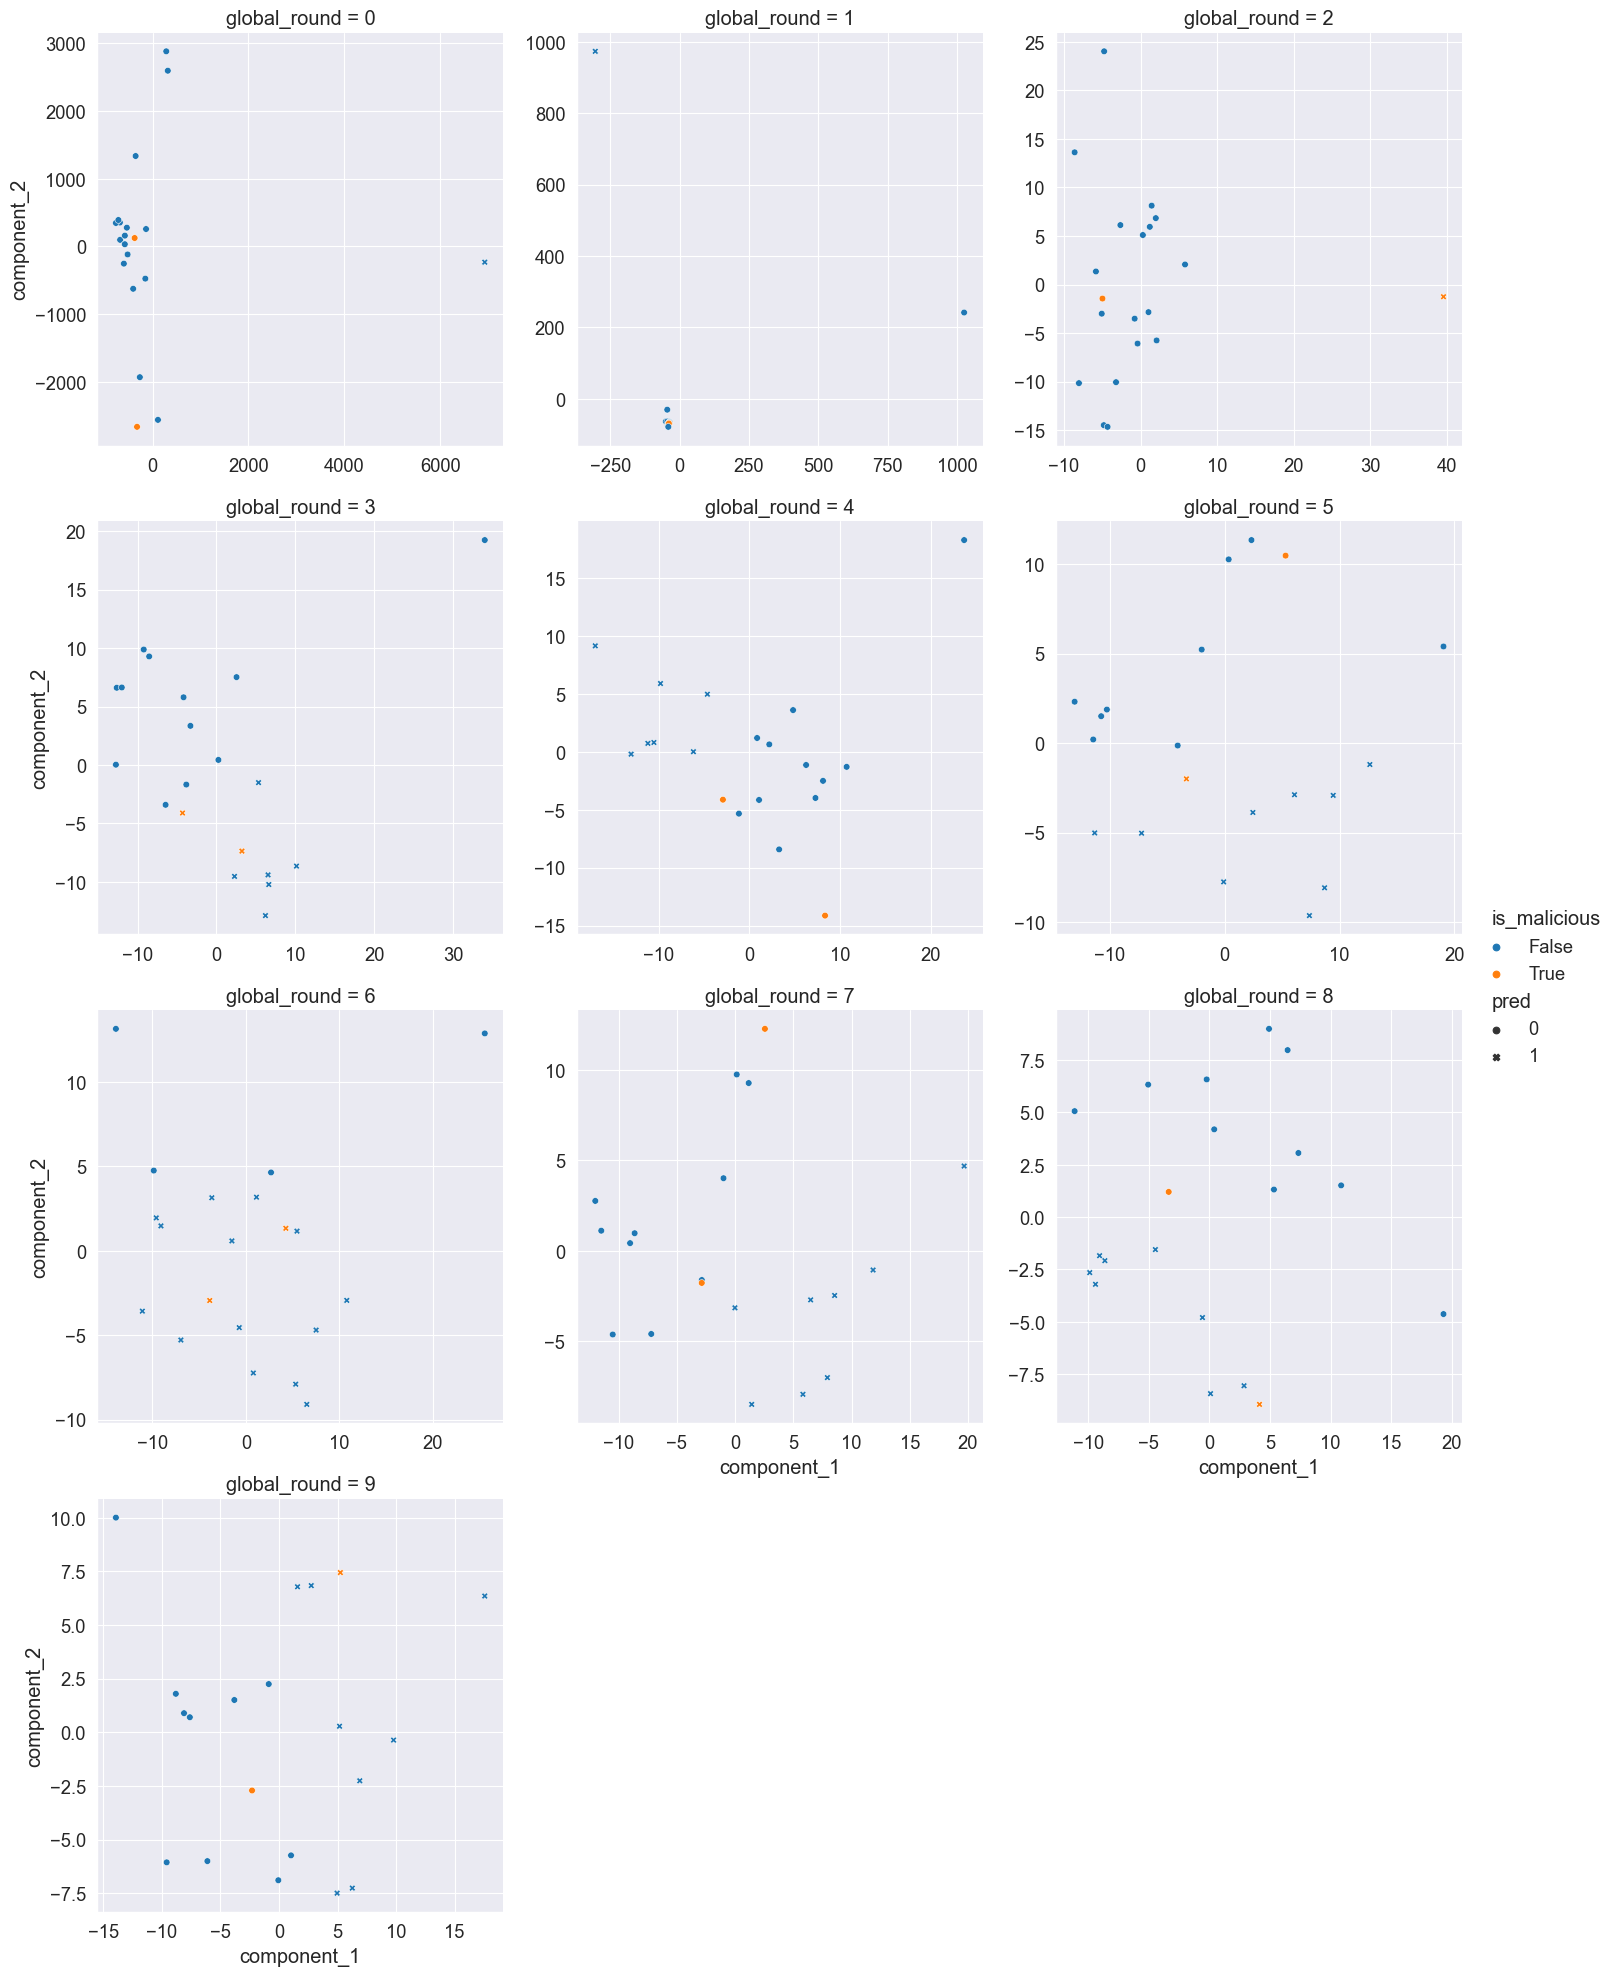

In [23]:
with sns.plotting_context("paper", font_scale=1.5):
    sns.relplot(
        df,
        kind="scatter",
        x="component_1",
        y="component_2",
        col="global_round",
        col_wrap=3,
        hue="is_malicious",
        style="pred",
        facet_kws=dict(sharex=False, sharey=False)
    )
    plt.show()

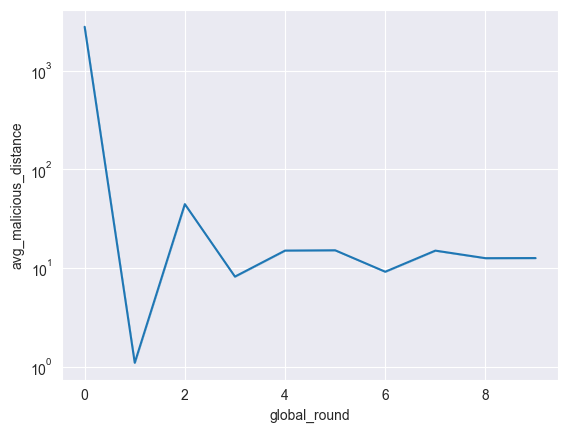

In [24]:
sns.lineplot(df, x="global_round", y="avg_malicious_distance").set(yscale="log")
plt.show()

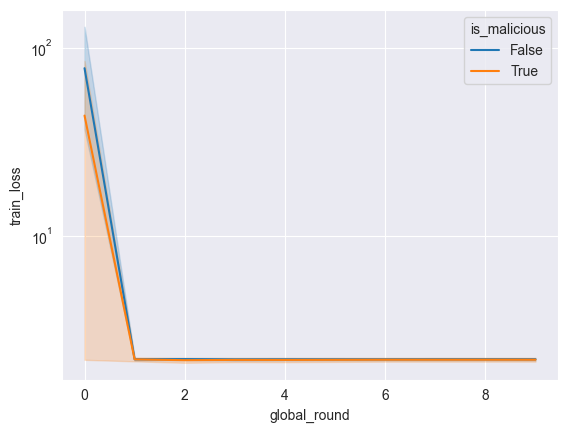

In [25]:
sns.lineplot(df, x="global_round", y="train_loss", hue="is_malicious").set(yscale="log")
plt.show()

In [26]:
df.train_loss.describe()

count    200.000000
mean       9.439993
std       36.357353
min        2.016783
25%        2.173844
50%        2.263886
75%        2.276378
max      388.375519
Name: train_loss, dtype: float64

In [27]:
df.endpoint.unique()

array([ 2, 10, 16,  4, 17, 19, 14, 15,  3, 18,  6,  5,  9,  1,  7, 11, 12,
       13,  0,  8])

In [35]:
temp_df = pd.read_csv(Path("../out/data/final-results/2023-08-03 03.50 PM.csv"), index_col=0)
temp_df.head()

,index,global_round,endpoint,train_loss,component_1,component_2,is_malicious,kmeans_pred,noise_scale,avg_malicious_distance
0,0,0,3,5.109967,-2424.546470,-221.136515,False,0,0.1,9852.710259
1,1,0,7,3.051069,7868.260814,-872.900587,False,1,0.1,9852.710259
2,2,0,2,2.639020,-720.509276,173.446456,False,1,0.1,9852.710259
3,3,0,0,2.216776,-6230.277934,-392.753431,True,0,0.1,9852.710259
4,4,0,6,2.949735,3488.966052,1223.475447,True,1,0.1,9852.710259


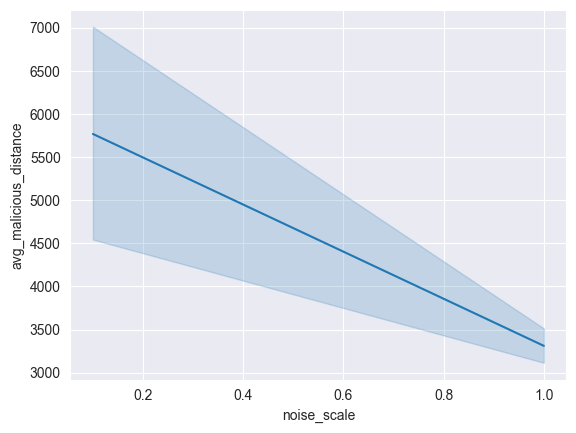

In [37]:
# temp_df["noise_scale"] = temp_df["noise_scale"].replace(None, 0)
sns.lineplot(temp_df, x="noise_scale", y="avg_malicious_distance")
plt.show()